In [1]:
import pandas as pd
import glob

# Load all CSV files from data folder
data_files = glob.glob('data/*.csv')
dataframes = [pd.read_csv(file) for file in data_files]

# Combine all datasets
combined_data = pd.concat(dataframes, ignore_index=True)


In [101]:
combined_data.head(1000)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,...,tolls_amount,improvement_surcharge,total_amount,RatecodeID,pickup_datetime,dropoff_datetime,trip_duration,hour,day_of_week,speed
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1.0,N,-73.974785,...,0.0,0.3,17.05,NaN,2015-01-15 19:05:39,2015-01-15 19:23:42,18.050000,19,3,5.285319
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1.0,N,-73.994415,...,0.0,0.3,17.80,NaN,2015-01-10 20:33:38,2015-01-10 20:53:28,19.833333,20,5,9.983193
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1.0,N,-73.951820,...,0.0,0.3,10.80,NaN,2015-01-10 20:33:38,2015-01-10 20:43:41,10.050000,20,5,10.746269
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1.0,N,-74.004326,...,0.0,0.3,4.80,NaN,2015-01-10 20:33:39,2015-01-10 20:35:31,1.866667,20,5,16.071429
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1.0,N,-74.004181,...,0.0,0.3,16.30,NaN,2015-01-10 20:33:39,2015-01-10 20:52:58,19.316667,20,5,9.318378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2015-01-07 20:40:04,2015-01-07 20:43:01,1,0.50,-73.993576,40.741859,1.0,N,-73.993057,...,0.0,0.3,6.89,NaN,2015-01-07 20:40:04,2015-01-07 20:43:01,2.950000,20,2,10.169492
996,1,2015-01-07 20:40:04,2015-01-07 21:02:43,2,4.20,-74.001778,40.739468,1.0,N,-73.953728,...,0.0,0.3,20.80,NaN,2015-01-07 20:40:04,2015-01-07 21:02:43,22.650000,20,2,11.125828
997,1,2015-01-07 20:40:04,2015-01-07 20:47:36,2,1.20,-74.002380,40.737835,1.0,N,-73.985878,...,0.0,0.3,8.30,NaN,2015-01-07 20:40:04,2015-01-07 20:47:36,7.533333,20,2,9.557522
998,1,2015-01-07 20:40:05,2015-01-07 21:04:15,1,4.50,-73.986290,40.752693,1.0,N,-73.952293,...,0.0,0.3,25.56,NaN,2015-01-07 20:40:05,2015-01-07 21:04:15,24.166667,20,2,11.172414


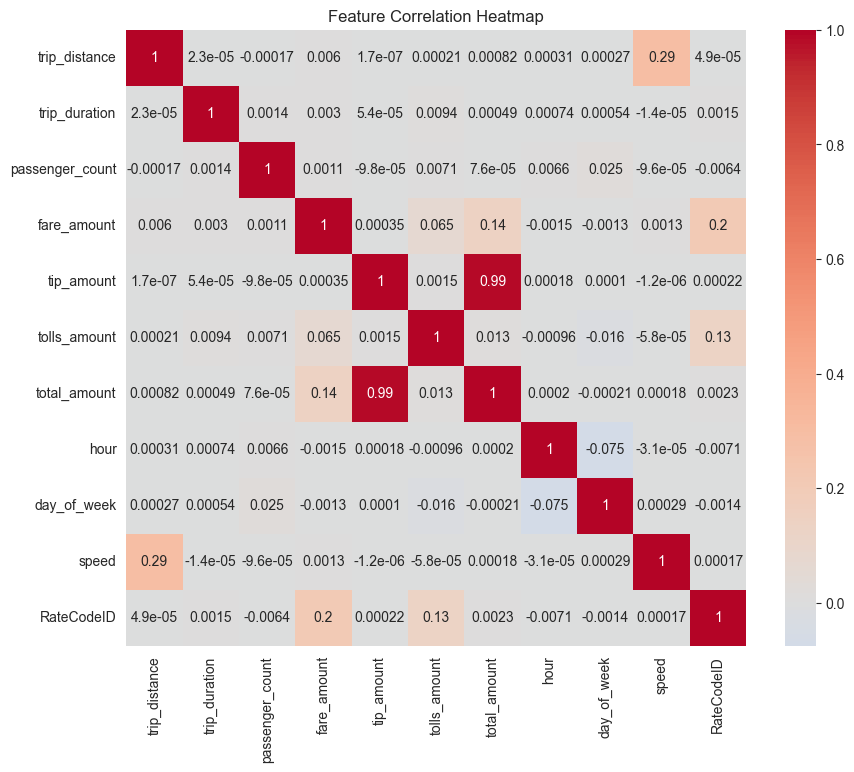

In [88]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

# Load all CSV files
data_files = glob.glob('data/*.csv')
dataframes = [pd.read_csv(file) for file in data_files]
combined_data = pd.concat(dataframes, ignore_index=True)

# Create meaningful features
combined_data['pickup_datetime'] = pd.to_datetime(combined_data['tpep_pickup_datetime'])
combined_data['dropoff_datetime'] = pd.to_datetime(combined_data['tpep_dropoff_datetime'])
combined_data['trip_duration'] = (combined_data['dropoff_datetime'] - combined_data['pickup_datetime']).dt.total_seconds() / 60
combined_data['hour'] = combined_data['pickup_datetime'].dt.hour
combined_data['day_of_week'] = combined_data['pickup_datetime'].dt.dayofweek
combined_data['speed'] = combined_data['trip_distance'] / (combined_data['trip_duration'] / 60)

# Select features for correlation analysis
features = ['trip_distance', 'trip_duration', 'passenger_count', 'fare_amount',
           'tip_amount', 'tolls_amount', 'total_amount', 'hour', 'day_of_week', 'speed', 'RateCodeID']

# Create correlation heatmap
corr_data = combined_data[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


Filtered from 100000 to 98171 records (removed extreme outliers)


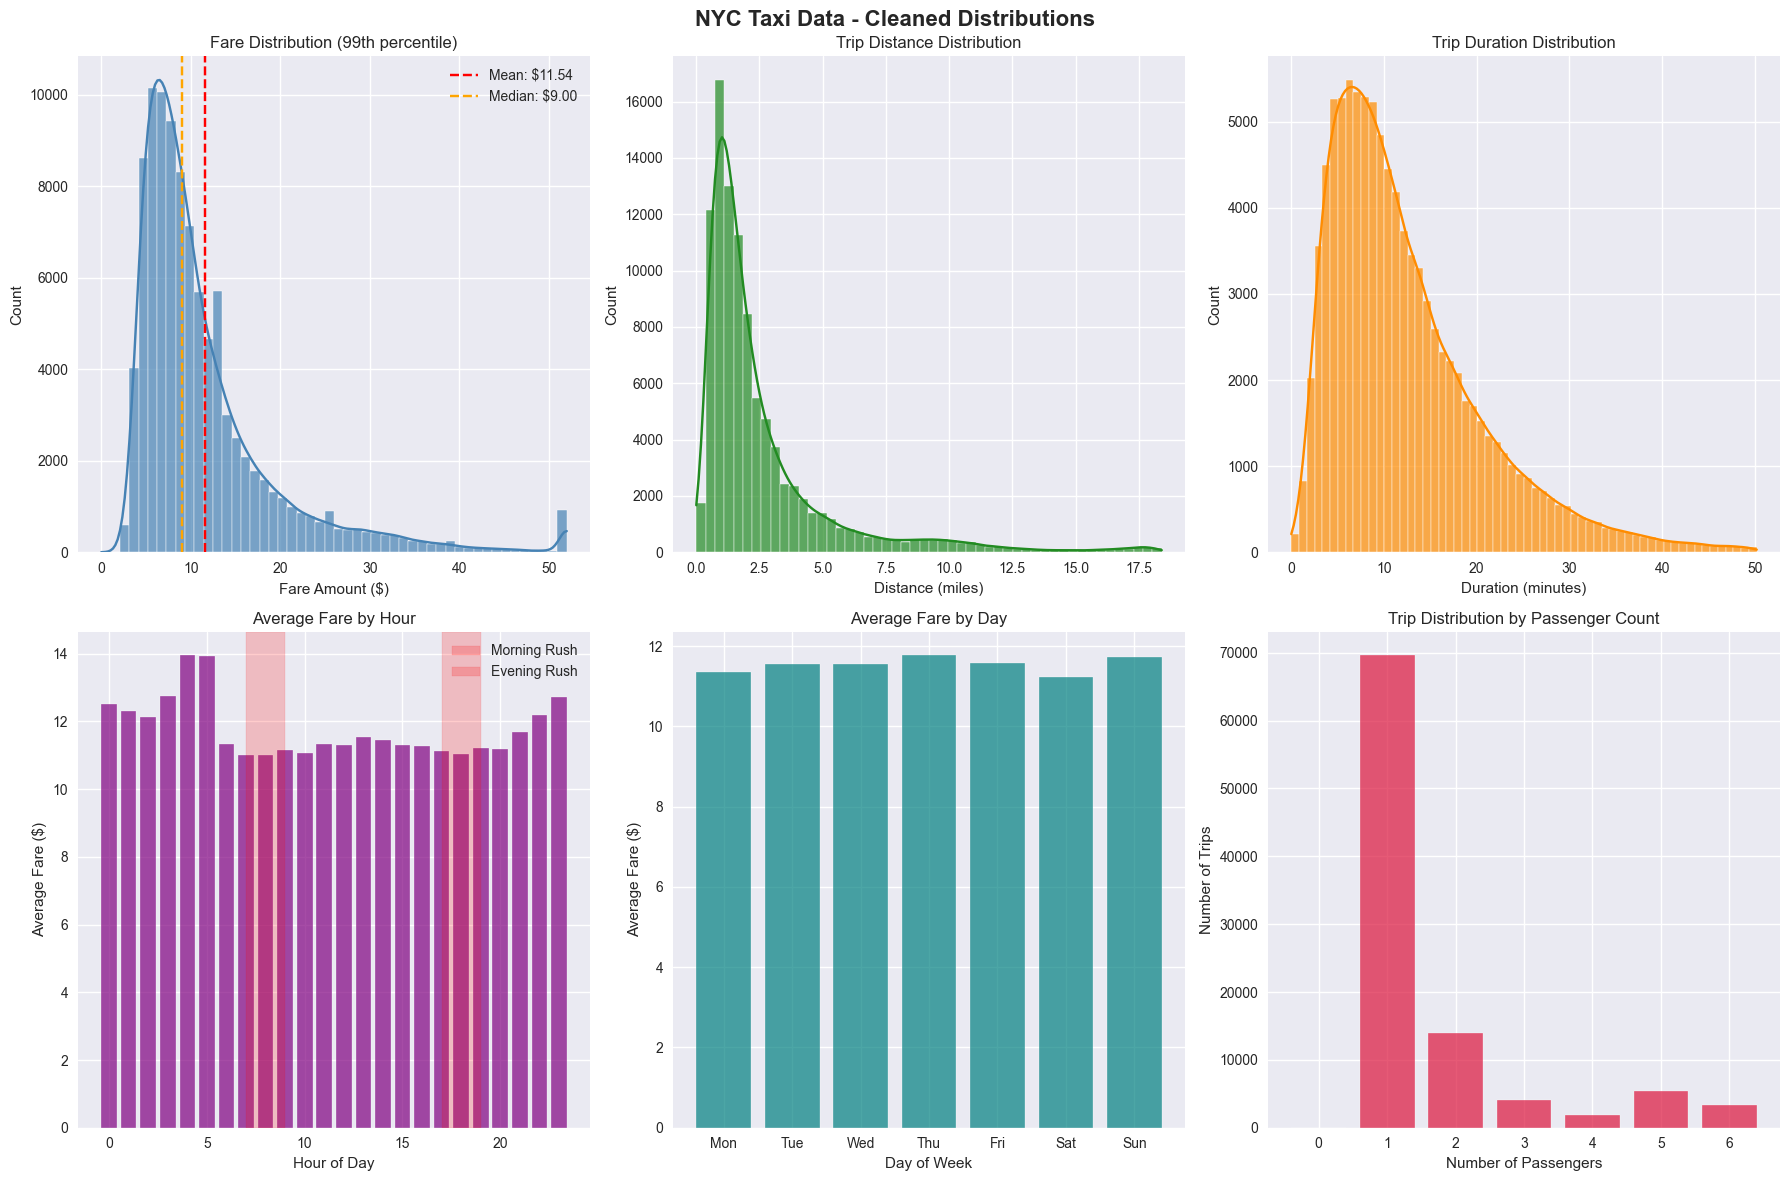

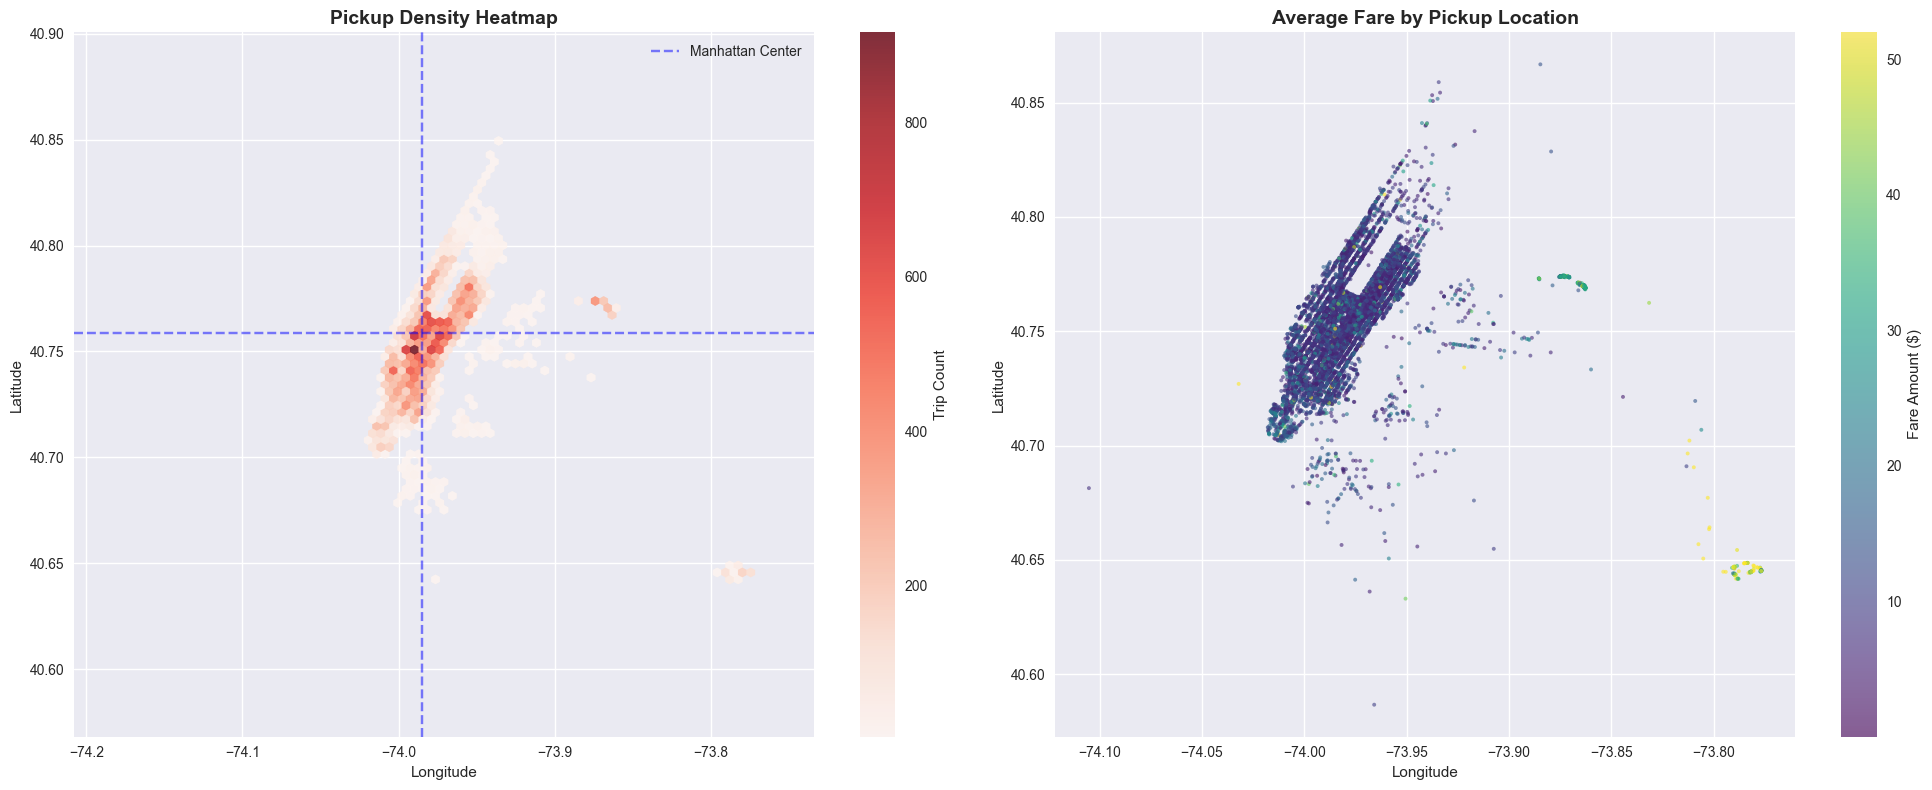

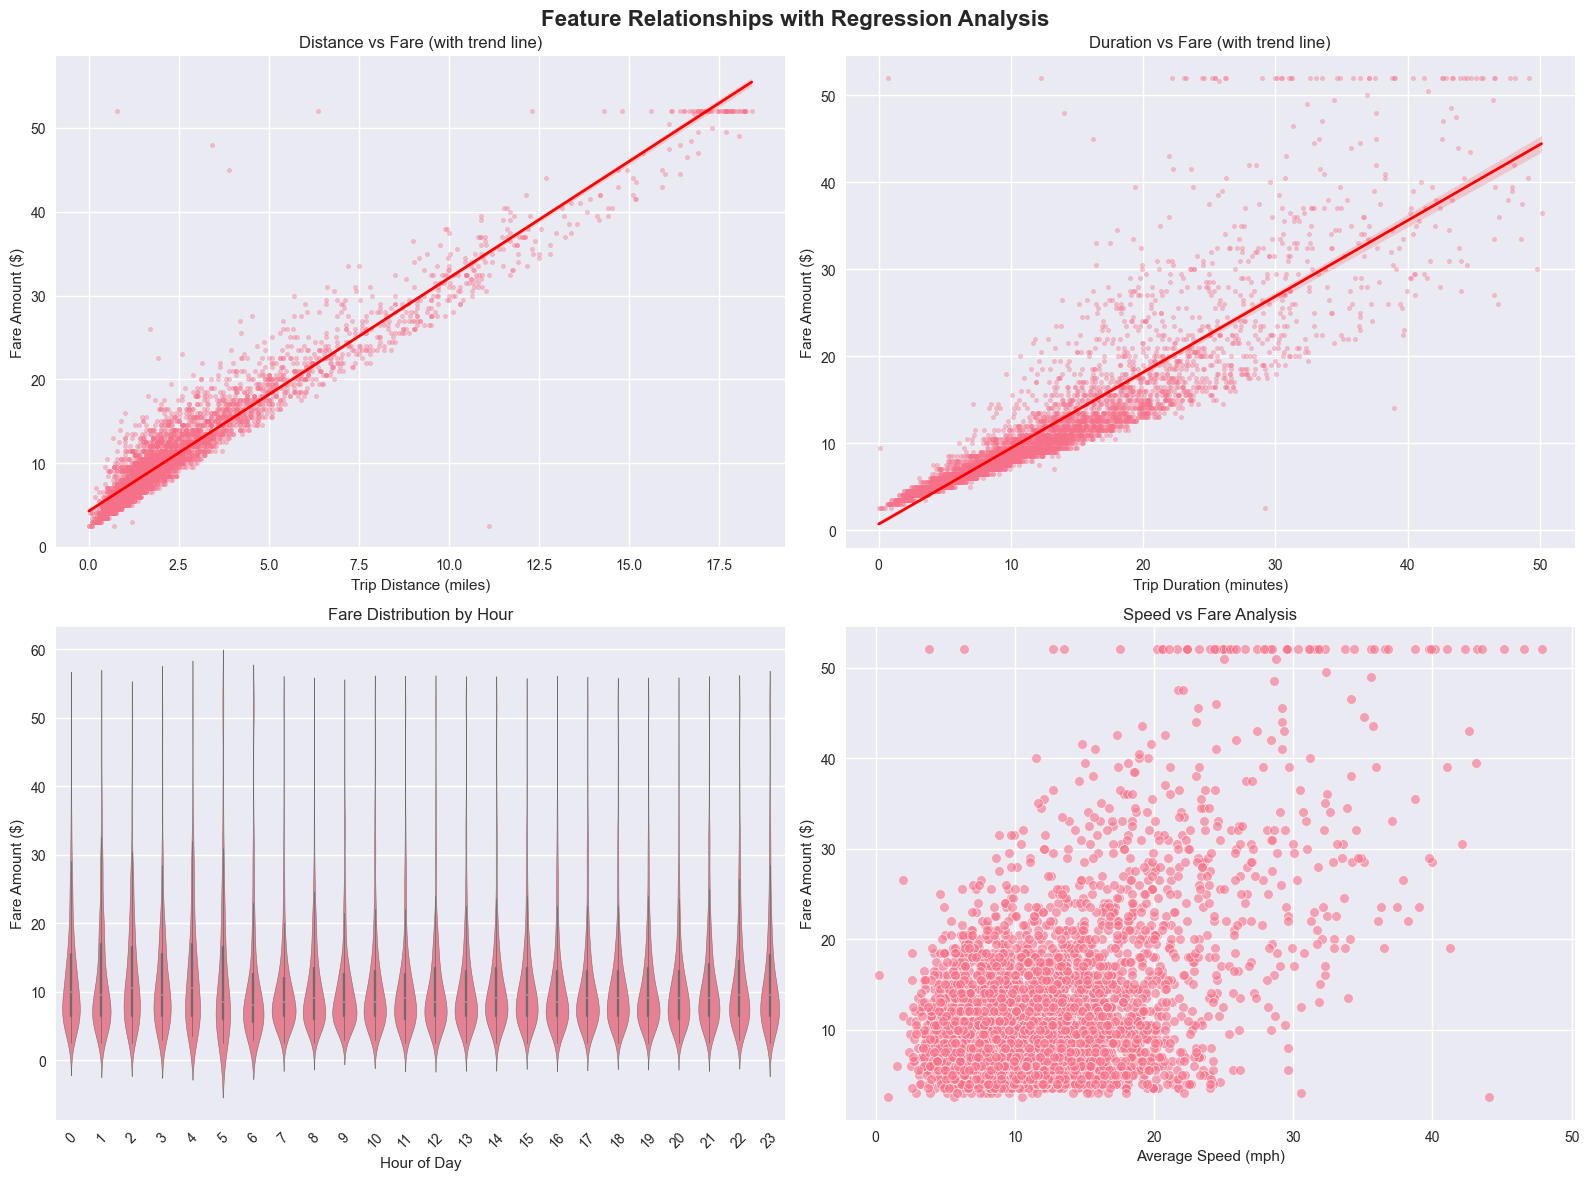


ENHANCED STATISTICAL SUMMARY
       fare_amount  trip_distance  trip_duration  passenger_count
count     98171.00       98171.00       98171.00         98171.00
mean         11.54           2.61          12.40             1.67
std           8.22           2.83           8.35             1.32
min           0.01           0.01           0.02             0.00
25%           6.50           1.00           6.32             1.00
50%           9.00           1.62          10.28             1.00
75%          13.50           2.97          16.33             2.00
max          52.00          18.40          50.20             6.00

KEY INSIGHTS:
• Peak hours: 4:00 ($13.95 avg fare)
• Busiest day: Thu ($11.77 avg fare)
• Most common passenger count: 1
• Average speed: 11.9 mph


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply outlier filtering for better visualization
def filter_for_viz(df, percentile=99):
    """Filter data to remove extreme outliers for visualization"""
    numeric_cols = ['fare_amount', 'trip_distance', 'trip_duration']
    filtered_df = df.copy()

    for col in numeric_cols:
        q99 = df[col].quantile(percentile/100)
        filtered_df = filtered_df[filtered_df[col] <= q99]

    return filtered_df

# Sample and filter data
viz_data = filter_for_viz(data_sample, 99)
print(f"Filtered from {len(data_sample)} to {len(viz_data)} records (removed extreme outliers)")

# 1. IMPROVED: Multi-panel with better scaling
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('NYC Taxi Data - Cleaned Distributions', fontsize=16, fontweight='bold')

# Fare distribution with statistics
sns.histplot(viz_data['fare_amount'], bins=50, kde=True, ax=axes[0,0], color='steelblue', alpha=0.7)
axes[0,0].axvline(viz_data['fare_amount'].mean(), color='red', linestyle='--', label=f'Mean: ${viz_data["fare_amount"].mean():.2f}')
axes[0,0].axvline(viz_data['fare_amount'].median(), color='orange', linestyle='--', label=f'Median: ${viz_data["fare_amount"].median():.2f}')
axes[0,0].set_title('Fare Distribution (99th percentile)')
axes[0,0].set_xlabel('Fare Amount ($)')
axes[0,0].legend()

# Distance with log scale option
sns.histplot(viz_data['trip_distance'], bins=50, kde=True, ax=axes[0,1], color='forestgreen', alpha=0.7)
axes[0,1].set_title('Trip Distance Distribution')
axes[0,1].set_xlabel('Distance (miles)')

# Duration with better binning
sns.histplot(viz_data['trip_duration'], bins=60, kde=True, ax=axes[0,2], color='darkorange', alpha=0.7)
axes[0,2].set_title('Trip Duration Distribution')
axes[0,2].set_xlabel('Duration (minutes)')

# Hourly patterns with annotations
hourly_avg = viz_data.groupby('hour')['fare_amount'].mean()
axes[1,0].bar(hourly_avg.index, hourly_avg.values, color='purple', alpha=0.7)
axes[1,0].set_title('Average Fare by Hour')
axes[1,0].set_xlabel('Hour of Day')
axes[1,0].set_ylabel('Average Fare ($)')
# Annotate rush hours
axes[1,0].axvspan(7, 9, alpha=0.2, color='red', label='Morning Rush')
axes[1,0].axvspan(17, 19, alpha=0.2, color='red', label='Evening Rush')
axes[1,0].legend()

# Weekly patterns
weekly_avg = viz_data.groupby('day_of_week')['fare_amount'].mean()
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[1,1].bar(range(7), weekly_avg.values, color='teal', alpha=0.7)
axes[1,1].set_title('Average Fare by Day')
axes[1,1].set_xlabel('Day of Week')
axes[1,1].set_ylabel('Average Fare ($)')
axes[1,1].set_xticks(range(7))
axes[1,1].set_xticklabels(day_names)

# Passenger count with percentages
passenger_counts = viz_data['passenger_count'].value_counts().sort_index()
axes[1,2].bar(passenger_counts.index, passenger_counts.values, color='crimson', alpha=0.7)
axes[1,2].set_title('Trip Distribution by Passenger Count')
axes[1,2].set_xlabel('Number of Passengers')
axes[1,2].set_ylabel('Number of Trips')

plt.tight_layout()
plt.show()

# 2. IMPROVED: Geographic analysis with NYC context
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Density heatmap with better resolution
geo_sample = viz_data.sample(50000)
hb = ax1.hexbin(geo_sample['pickup_longitude'], geo_sample['pickup_latitude'],
                gridsize=80, cmap='Reds', mincnt=5, alpha=0.8)
ax1.set_title('Pickup Density Heatmap', fontsize=14, fontweight='bold')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
plt.colorbar(hb, ax=ax1, label='Trip Count')

# Add NYC borough boundaries (approximate)
ax1.axhline(y=40.7589, color='blue', linestyle='--', alpha=0.5, label='Manhattan Center')
ax1.axvline(x=-73.9851, color='blue', linestyle='--', alpha=0.5)
ax1.legend()

# Fare by location with better sampling
fare_sample = viz_data.sample(10000)
scatter = ax2.scatter(fare_sample['pickup_longitude'], fare_sample['pickup_latitude'],
                     c=fare_sample['fare_amount'], cmap='viridis',
                     alpha=0.6, s=8, edgecolors='none')
ax2.set_title('Average Fare by Pickup Location', fontsize=14, fontweight='bold')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
plt.colorbar(scatter, ax=ax2, label='Fare Amount ($)')

plt.tight_layout()
plt.show()

# 3. IMPROVED: Correlation analysis with regression lines
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Feature Relationships with Regression Analysis', fontsize=16, fontweight='bold')

# Distance vs Fare with regression
sample_reg = viz_data.sample(5000)
axes[0,0].scatter(sample_reg['trip_distance'], sample_reg['fare_amount'], alpha=0.4, s=10)
sns.regplot(data=sample_reg, x='trip_distance', y='fare_amount', ax=axes[0,0],
           scatter=False, color='red', line_kws={'linewidth': 2})
axes[0,0].set_title('Distance vs Fare (with trend line)')
axes[0,0].set_xlabel('Trip Distance (miles)')
axes[0,0].set_ylabel('Fare Amount ($)')

# Duration vs Fare with regression
axes[0,1].scatter(sample_reg['trip_duration'], sample_reg['fare_amount'], alpha=0.4, s=10)
sns.regplot(data=sample_reg, x='trip_duration', y='fare_amount', ax=axes[0,1],
           scatter=False, color='red', line_kws={'linewidth': 2})
axes[0,1].set_title('Duration vs Fare (with trend line)')
axes[0,1].set_xlabel('Trip Duration (minutes)')
axes[0,1].set_ylabel('Fare Amount ($)')

# Hourly fare distribution (violin plot)
sns.violinplot(data=viz_data.sample(20000), x='hour', y='fare_amount', ax=axes[1,0])
axes[1,0].set_title('Fare Distribution by Hour')
axes[1,0].set_xlabel('Hour of Day')
axes[1,0].set_ylabel('Fare Amount ($)')
axes[1,0].tick_params(axis='x', rotation=45)

# Speed analysis (new insight)
viz_data['speed'] = viz_data['trip_distance'] / (viz_data['trip_duration'] / 60)
viz_data_speed = viz_data[(viz_data['speed'] > 0) & (viz_data['speed'] < 60)]  # Reasonable speeds
sns.scatterplot(data=viz_data_speed.sample(5000), x='speed', y='fare_amount', ax=axes[1,1], alpha=0.6)
axes[1,1].set_title('Speed vs Fare Analysis')
axes[1,1].set_xlabel('Average Speed (mph)')
axes[1,1].set_ylabel('Fare Amount ($)')

plt.tight_layout()
plt.show()

# 4. SUMMARY STATISTICS TABLE
print("\n" + "="*60)
print("ENHANCED STATISTICAL SUMMARY")
print("="*60)

summary_stats = viz_data[['fare_amount', 'trip_distance', 'trip_duration', 'passenger_count']].describe()
print(summary_stats.round(2))

print(f"\nKEY INSIGHTS:")
print(f"• Peak hours: {hourly_avg.idxmax()}:00 (${hourly_avg.max():.2f} avg fare)")
print(f"• Busiest day: {day_names[weekly_avg.idxmax()]} (${weekly_avg.max():.2f} avg fare)")
print(f"• Most common passenger count: {viz_data['passenger_count'].mode()[0]}")
print(f"• Average speed: {viz_data_speed['speed'].mean():.1f} mph")


# Data preparation

In [102]:
# Remove duplicates and handle missing values
data = combined_data.drop_duplicates()
data = data.dropna(subset=['pickup_longitude', 'pickup_latitude', 'trip_distance', 'fare_amount', 'RateCodeID'])

# Remove invalid coordinates (outside NYC bounds)
data = data[(data['pickup_longitude'] >= -74.3) & (data['pickup_longitude'] <= -73.7)]
data = data[(data['pickup_latitude'] >= 40.5) & (data['pickup_latitude'] <= 40.9)]


In [103]:
# Convert datetime to numerical features
data['pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['hour'] = data['pickup_datetime'].dt.hour
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek

# Calculate trip duration
data['dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
data['trip_duration'] = (data['dropoff_datetime'] - data['pickup_datetime']).dt.total_seconds() / 60

In [104]:
# Remove extreme outliers that are clearly data errors
data = data[data['trip_distance'] > 0]
data = data[data['fare_amount'] > 0]
data = data[data['trip_duration'] > 0]
data = data[data['trip_duration'] < 300]  # Less than 5 hours


In [105]:
# Select numerical features for anomaly detection
rcf_features = [
    'trip_distance', 'fare_amount', 'trip_duration',
    'pickup_longitude', 'pickup_latitude',
    'hour', 'day_of_week', 'passenger_count', 'RateCodeID'
]
X = data[rcf_features].copy()


In [106]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [107]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# RCF works well with samples, use 10-50k records for training
if len(X_scaled) > 50000:
    sample_size = 50000
    X_train = X_scaled[np.random.choice(len(X_scaled), sample_size, replace=False)]
else:
    X_train = X_scaled


Removed 124515 extreme outliers (1.0%)
New fare range: $3.50 - $52.00
New fare std: $8.83

Train sample std: $8.82
Test std: $8.83

GridSearch on 10000 samples
GridSearch time: 7.5 seconds
Training on 50000 samples...
Training time: 1.3 seconds
Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score: 0.988

Model Performance Metrics:
R²: 0.991
MAE: 0.285
MSE: 0.697
RMSE: 0.835
MAPE: 2.7%
Mean Residual: -0.000
Std Residual: 0.835


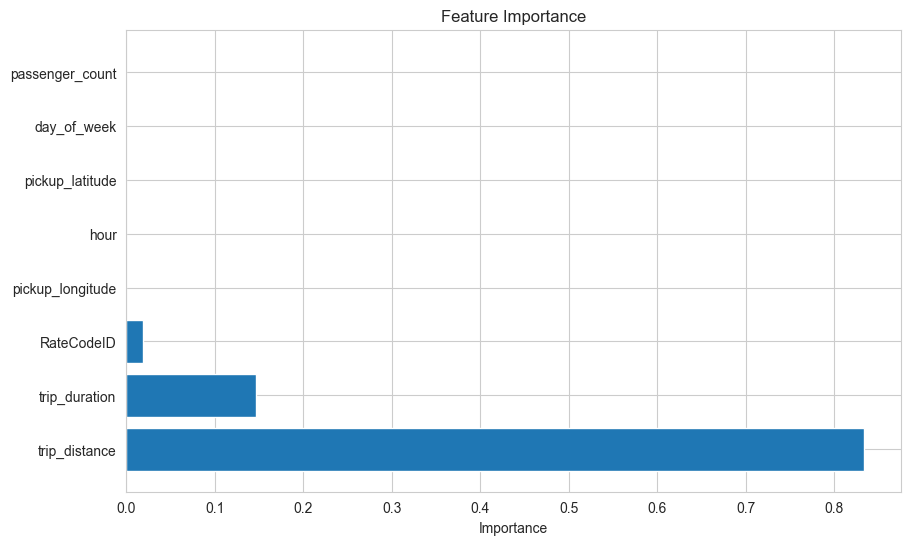


Feature Importance:
            feature  importance
0     trip_distance    0.834012
1     trip_duration    0.146505
7        RateCodeID    0.018900
5  pickup_longitude    0.000192
2              hour    0.000155
6   pickup_latitude    0.000135
3       day_of_week    0.000074
4   passenger_count    0.000028
Contamination 0.05: 123011 anomalies (5.0%)
Contamination 0.1: 246022 anomalies (10.0%)
Contamination 0.15: 369033 anomalies (15.0%)


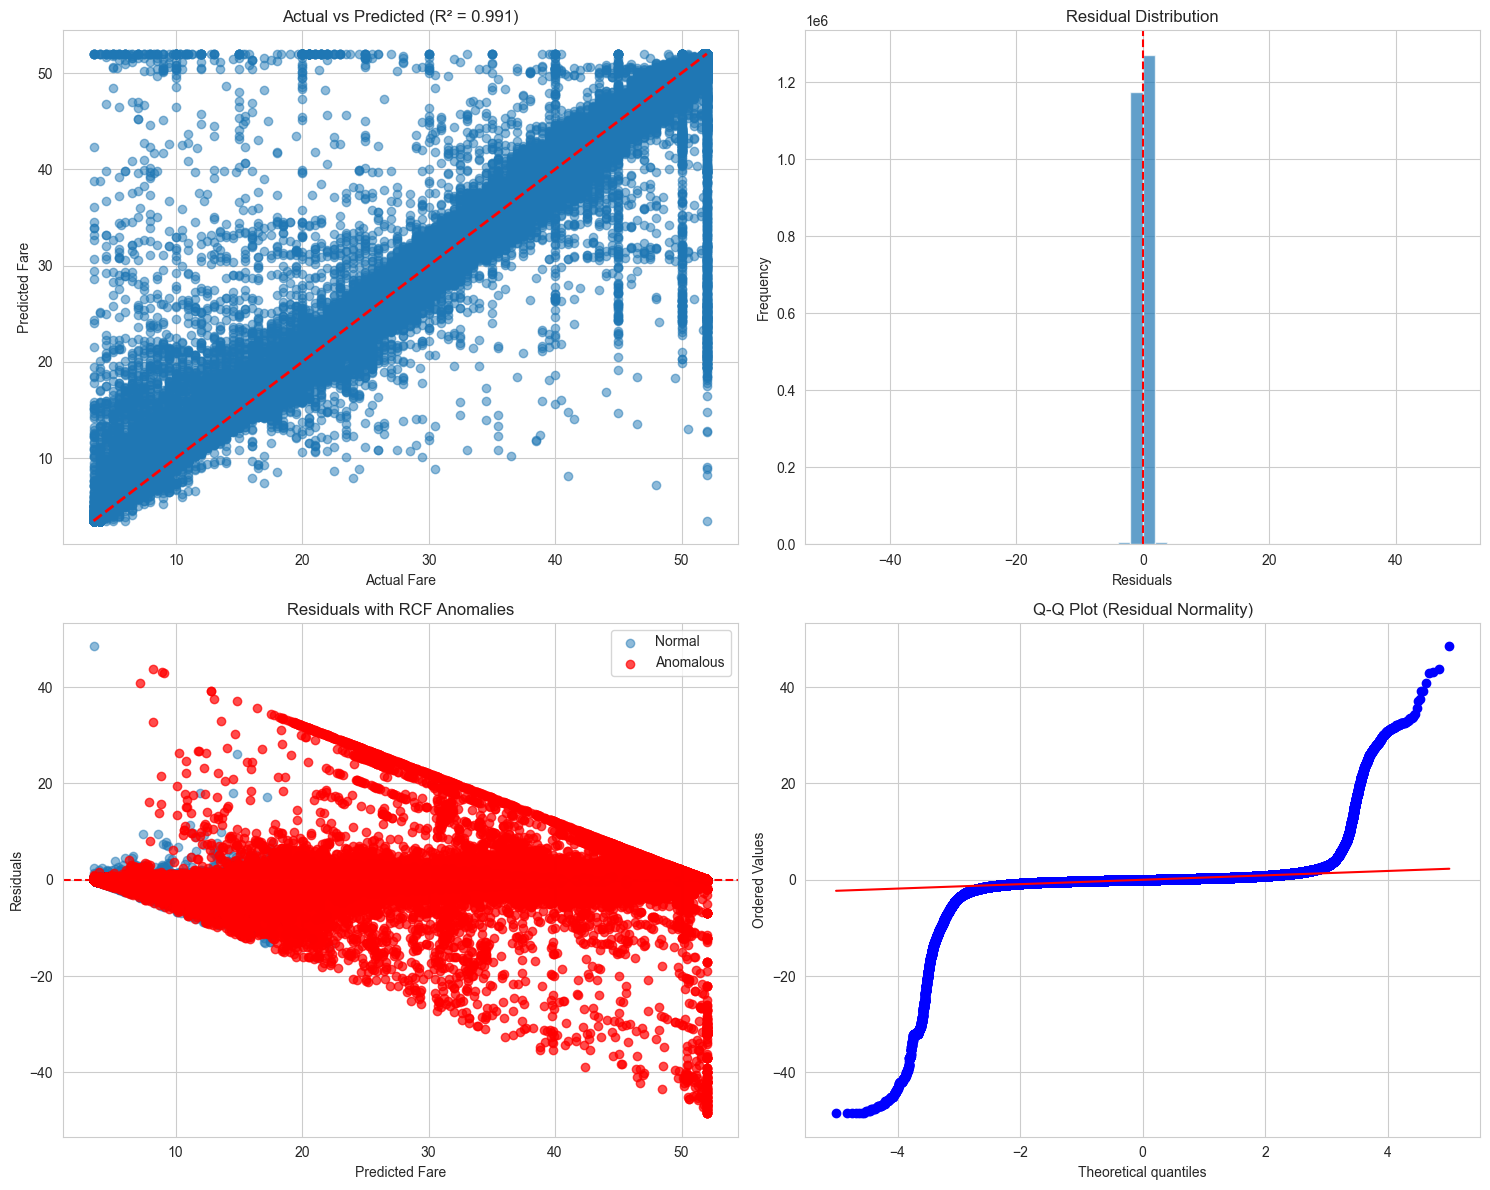

In [131]:
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np
import time

# 1. Remove extreme outliers BEFORE sampling
y = data['fare_amount']
X_reg = data[['trip_distance', 'trip_duration', 'hour', 'day_of_week',
              'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RateCodeID']]

# Filter out extreme outliers (keep 98% of data)
fare_q95 = y.quantile(0.99)
fare_q05 = y.quantile(0.01)
mask = (y >= fare_q05) & (y <= fare_q95)
X_reg_clean = X_reg[mask]
y_clean = y[mask]

print(f"Removed {(~mask).sum()} extreme outliers ({(~mask).mean()*100:.1f}%)")
print(f"New fare range: ${y_clean.min():.2f} - ${y_clean.max():.2f}")
print(f"New fare std: ${y_clean.std():.2f}")

X_train, X_test, y_train, y_test = train_test_split(X_reg_clean, y_clean, test_size=0.2, random_state=42)

# Use 50k sample for training
train_sample_size = min(50000, len(X_train))
train_idx = np.random.choice(len(X_train), train_sample_size, replace=False)
X_train_sample, y_train_sample = X_train.iloc[train_idx], y_train.iloc[train_idx]

# GridSearch on 10k subset
grid_sample_size = min(10000, len(X_train_sample))
grid_idx = np.random.choice(len(X_train_sample), grid_sample_size, replace=False)
X_grid_sample, y_grid_sample = X_train_sample.iloc[grid_idx], y_train_sample.iloc[grid_idx]

# Check new distribution
print(f"\nTrain sample std: ${y_train_sample.std():.2f}")
print(f"Test std: ${y_test.std():.2f}")

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10]
}

print(f"\nGridSearch on {grid_sample_size} samples")
start = time.time()
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_grid_sample, y_grid_sample)
print(f"GridSearch time: {time.time() - start:.1f} seconds")

# Train best model on 50k samples
print(f"Training on {train_sample_size} samples...")
start = time.time()
best_model = grid_search.best_estimator_
best_model.fit(X_train_sample, y_train_sample)
print(f"Training time: {time.time() - start:.1f} seconds")

y_pred = best_model.predict(X_test)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.3f}")

# 2. Metrics
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    residuals = y_true - y_pred
    return {
        'R²': r2, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape,
        'Mean Residual': np.mean(residuals), 'Std Residual': np.std(residuals)
    }

metrics = calculate_metrics(y_test, y_pred)
print("\nModel Performance Metrics:")
for metric, value in metrics.items():
    if metric in ['MAPE']:
        print(f"{metric}: {value:.1%}")
    else:
        print(f"{metric}: {value:.3f}")

# 3. Feature importance
feature_importance = pd.DataFrame({
    'feature': X_reg_clean.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

print("\nFeature Importance:")
print(feature_importance)

# 4. RCF anomaly detection
residuals = y_test - y_pred
residual_data = np.column_stack([X_test, residuals.values])

contamination_rates = [0.05, 0.1, 0.15]
rcf_results = {}

for rate in contamination_rates:
    rcf = IsolationForest(contamination=rate, random_state=42, n_estimators=100)
    anomalies = rcf.fit_predict(residual_data)
    anomaly_count = sum(anomalies == -1)
    rcf_results[rate] = {
        'anomalies': anomalies,
        'count': anomaly_count,
        'percentage': (anomaly_count / len(anomalies)) * 100
    }
    print(f"Contamination {rate}: {anomaly_count} anomalies ({rcf_results[rate]['percentage']:.1f}%)")

# 5. Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].scatter(y_test, y_pred, alpha=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Fare')
axes[0, 0].set_ylabel('Predicted Fare')
axes[0, 0].set_title(f'Actual vs Predicted (R² = {metrics["R²"]:.3f})')

axes[0, 1].hist(residuals, bins=50, alpha=0.7)
axes[0, 1].axvline(x=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Residual Distribution')

anomaly_mask = rcf_results[0.1]['anomalies'] == -1
axes[1, 0].scatter(y_pred[~anomaly_mask], residuals[~anomaly_mask], alpha=0.5, label='Normal')
axes[1, 0].scatter(y_pred[anomaly_mask], residuals[anomaly_mask], color='red', alpha=0.7, label='Anomalous')
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted Fare')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals with RCF Anomalies')
axes[1, 0].legend()

from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Residual Normality)')

plt.tight_layout()
plt.show()


Removed 4404208 extreme outliers (9.5%)
New fare range: $4.50 - $32.50
GridSearch on 10000 samples
GridSearch time: 5.1 seconds
Training on FULL dataset: 33,402,964 samples...
Full training time: 20.2 minutes
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best CV score: 0.992

FULL MODEL Performance Metrics:
R²: 0.994
MAE: 0.266
MSE: 0.211
RMSE: 0.460
MAPE: 2.6%
Mean Residual: -0.000
Std Residual: 0.460


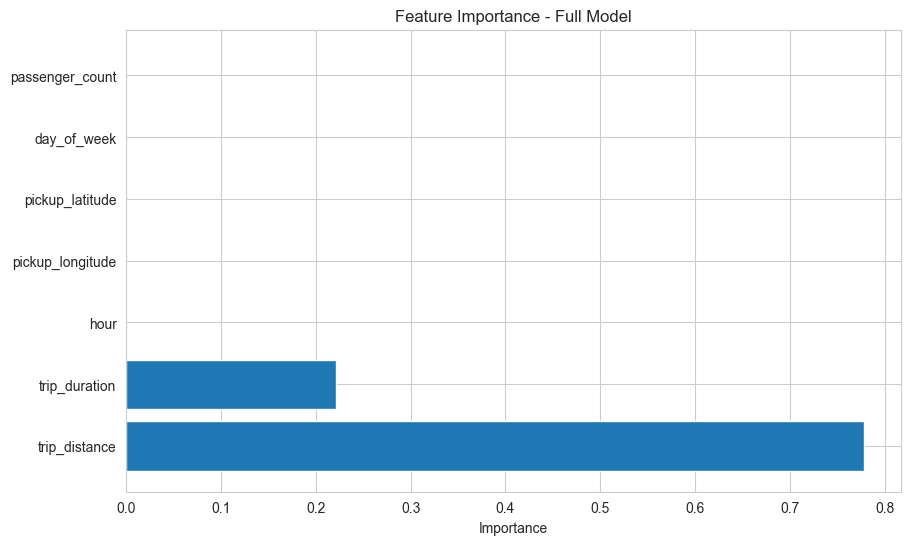


Feature Importance:
            feature    importance
0     trip_distance  7.786005e-01
1     trip_duration  2.213408e-01
2              hour  2.727309e-05
5  pickup_longitude  1.307839e-05
6   pickup_latitude  1.235763e-05
3       day_of_week  5.321787e-06
4   passenger_count  6.255531e-07
Contamination 0.05: 417538 anomalies (5.0%)
Contamination 0.1: 835075 anomalies (10.0%)
Contamination 0.15: 1252612 anomalies (15.0%)


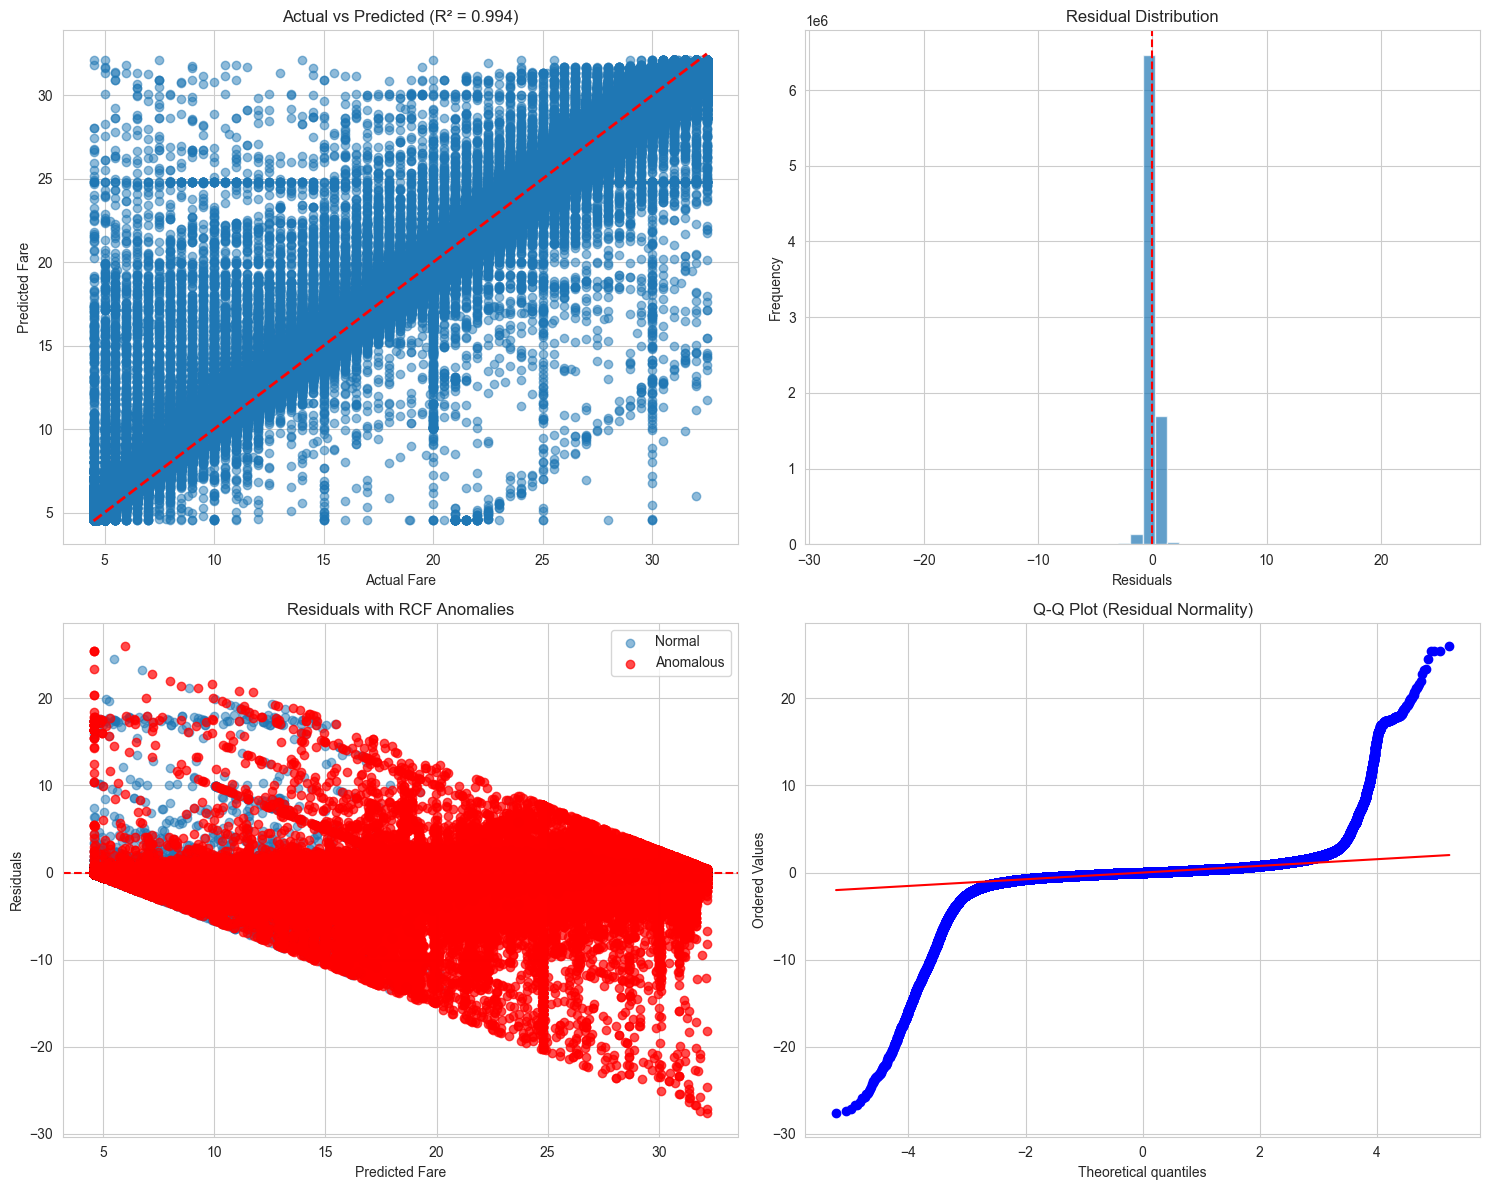

In [14]:
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np
import time

# 1. Remove extreme outliers BEFORE sampling
y = data['fare_amount']
X_reg = data[['trip_distance', 'trip_duration', 'hour', 'day_of_week',
              'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RateCodeID']]

# Filter out extreme outliers (keep 95% of data)
fare_q95 = y.quantile(0.95)
fare_q05 = y.quantile(0.05)
mask = (y >= fare_q05) & (y <= fare_q95)
X_reg_clean = X_reg[mask]
y_clean = y[mask]

print(f"Removed {(~mask).sum()} extreme outliers ({(~mask).mean()*100:.1f}%)")
print(f"New fare range: ${y_clean.min():.2f} - ${y_clean.max():.2f}")

X_train, X_test, y_train, y_test = train_test_split(X_reg_clean, y_clean, test_size=0.2, random_state=42)

# GridSearch on 10k sample (for hyperparameters only)
grid_sample_size = min(10000, len(X_train))
grid_idx = np.random.choice(len(X_train), grid_sample_size, replace=False)
X_grid_sample, y_grid_sample = X_train.iloc[grid_idx], y_train.iloc[grid_idx]

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10]
}

print(f"GridSearch on {grid_sample_size} samples")
start = time.time()
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_grid_sample, y_grid_sample)
print(f"GridSearch time: {time.time() - start:.1f} seconds")

# Train best model on FULL training set
print(f"Training on FULL dataset: {len(X_train):,} samples...")
start = time.time()
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
print(f"Full training time: {(time.time() - start)/60:.1f} minutes")

y_pred = best_model.predict(X_test)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.3f}")

# 2. Metrics
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    residuals = y_true - y_pred
    return {
        'R²': r2, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape,
        'Mean Residual': np.mean(residuals), 'Std Residual': np.std(residuals)
    }

metrics = calculate_metrics(y_test, y_pred)
print("\nFULL MODEL Performance Metrics:")
for metric, value in metrics.items():
    if metric in ['MAPE']:
        print(f"{metric}: {value:.1%}")
    else:
        print(f"{metric}: {value:.3f}")

# 3. Feature importance
feature_importance = pd.DataFrame({
    'feature': X_reg_clean.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance - Full Model')
plt.xlabel('Importance')
plt.show()

print("\nFeature Importance:")
print(feature_importance)

# 4. RCF anomaly detection
residuals = y_test - y_pred
residual_data = np.column_stack([X_test, residuals.values])

contamination_rates = [0.05, 0.1, 0.15]
rcf_results = {}

for rate in contamination_rates:
    rcf = IsolationForest(contamination=rate, random_state=42, n_estimators=100)
    anomalies = rcf.fit_predict(residual_data)
    anomaly_count = sum(anomalies == -1)
    rcf_results[rate] = {
        'anomalies': anomalies,
        'count': anomaly_count,
        'percentage': (anomaly_count / len(anomalies)) * 100
    }
    print(f"Contamination {rate}: {anomaly_count} anomalies ({rcf_results[rate]['percentage']:.1f}%)")

# 5. Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].scatter(y_test, y_pred, alpha=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Fare')
axes[0, 0].set_ylabel('Predicted Fare')
axes[0, 0].set_title(f'Actual vs Predicted (R² = {metrics["R²"]:.3f})')

axes[0, 1].hist(residuals, bins=50, alpha=0.7)
axes[0, 1].axvline(x=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Residual Distribution')

anomaly_mask = rcf_results[0.1]['anomalies'] == -1
axes[1, 0].scatter(y_pred[~anomaly_mask], residuals[~anomaly_mask], alpha=0.5, label='Normal')
axes[1, 0].scatter(y_pred[anomaly_mask], residuals[anomaly_mask], color='red', alpha=0.7, label='Anomalous')
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted Fare')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals with RCF Anomalies')
axes[1, 0].legend()

from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Residual Normality)')

plt.tight_layout()
plt.show()


In [137]:
import joblib
import pickle
from datetime import datetime

# Save the model and preprocessing info
model_info = {
    'model': best_model,
    'feature_columns': X_reg_clean.columns.tolist(),
    'fare_q05': fare_q05,
    'fare_q95': fare_q95,
    'metrics': metrics,
    'trained_on': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'training_samples': len(X_train)
}

# Save using joblib (recommended for sklearn models)
joblib.dump(model_info, 'taxi_fare_model.pkl')

# Alternative: Save using pickle
# with open('taxi_fare_model.pkl', 'wb') as f:
#     pickle.dump(model_info, f)

print("Model saved as 'taxi_fare_model.pkl'")
print(f"File size: {os.path.getsize('taxi_fare_model.pkl') / 1024 / 1024:.1f} MB")

# To load later:
# loaded_model_info = joblib.load('taxi_fare_model.pkl')
# model = loaded_model_info['model']
# features = loaded_model_info['feature_columns']



Model saved as 'taxi_fare_model.pkl'


NameError: name 'os' is not defined

In [138]:
import joblib

# Load the trained model
loaded_model_info = joblib.load('taxi_fare_model.pkl')
model = loaded_model_info['model']
features = loaded_model_info['feature_columns']

print("Loaded model trained on:", loaded_model_info['training_samples'], "samples")
print("Expected features:", features)

Loaded model trained on: 9840865 samples
Expected features: ['trip_distance', 'trip_duration', 'hour', 'day_of_week', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RateCodeID']


In [148]:
import pandas as pd

# Example trip input
new_trip = pd.DataFrame([{
    'trip_distance': 1.59,        # in kilometers
    'trip_duration': 5*60,        # in seconds (12 minutes)
    'hour': 14,                  # 2 PM
    'day_of_week': 3,            # Wednesday (if 0=Monday)
    'passenger_count': 1,
    'pickup_longitude': -73.993896,
    'pickup_latitude': 40.750111,
    'RateCodeID': 1

}])[features]  # ensure correct column order

predicted_fare = model.predict(new_trip)[0]
print(f"Estimated Fare: ${predicted_fare:.2f}")

Estimated Fare: $11.14
